In [260]:
import numpy as np
import matplotlib.pyplot as plt

In [261]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

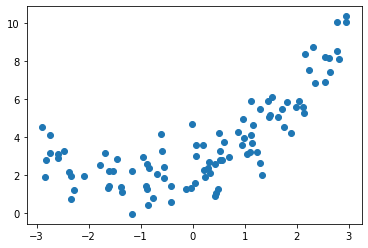

In [262]:
plt.scatter(X,y)
plt.show()

In [263]:
from sklearn.preprocessing import PolynomialFeatures


In [264]:
poly_features=PolynomialFeatures(degree=2,include_bias=False)

In [265]:
X_poly=poly_features.fit_transform(X)

In [266]:
X_poly[0]

array([-0.55482737,  0.30783341])

In [267]:
from sklearn.linear_model import LinearRegression

In [268]:
lin_reg=LinearRegression()

In [269]:
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [270]:
lin_reg.intercept_

array([2.22187689])

In [271]:
lin_reg.coef_

array([[1.01602221, 0.47809217]])

In [272]:
m=100
X_=6*np.random.rand(m,1)-3
y_=0.44127839*X_**2+0.93143972*X_+2.03587119

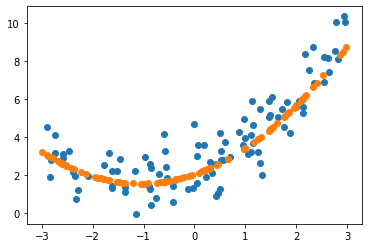

In [273]:
plt.scatter(X,y)
plt.scatter(X_,y_)
plt.show()

In [274]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [275]:
def plot_learning_curves(model,X,y):
  X_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
  train_error,val_error=[],[]
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_pred=model.predict(X_train[:m])
    y_val_pred=model.predict(x_val)
    train_error.append(mean_squared_error(y_train[:m],y_train_pred))
    val_error.append(mean_squared_error(y_val,y_val_pred))
  plt.plot(np.sqrt(train_error),'r-+',label='train')
  plt.plot(np.sqrt(val_error),'b-',label='val')

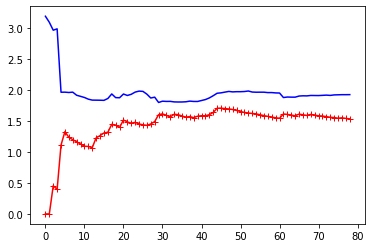

In [276]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

In [277]:
from sklearn.pipeline import Pipeline


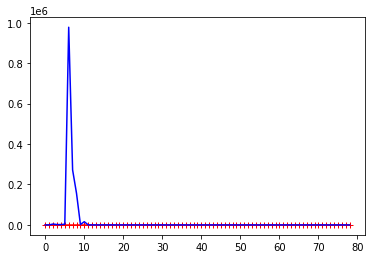

In [278]:
poly_regg=Pipeline([('poly_feat',PolynomialFeatures(degree=10,include_bias=False)),
                    ('lin_reg',LinearRegression())])
plot_learning_curves(poly_regg,X,y)

In [279]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

In [280]:
poly_scalr=Pipeline([('poly_feature',PolynomialFeatures(degree=90,include_bias=False)),
                     ('std_scaler',StandardScaler())])

In [281]:
# X_train_poly_scaled=poly_scalr.fit_transform(X_train)

In [282]:
from sklearn import datasets

In [283]:
iris=datasets.load_iris()

In [284]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [285]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [286]:
iris['data'][0]

array([5.1, 3.5, 1.4, 0.2])

In [287]:
iris['target'][0]

0

In [288]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [289]:
X=iris['data'][:,3:]
y=(iris['target']==2).astype(np.int)

In [290]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [291]:
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [292]:
X_new=np.linspace(0,3,1000).reshape(-1,1)

In [293]:
y_proba_log=log_reg.predict(X_new)

In [295]:
X_=iris['data'][:,(2,3)]
y_=iris['target']

In [297]:
softmax_reg=LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X_,y_)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)